# Ch2 - Traitement d'images dans le domaine spatial
**INF600F - Traitement d'images (UQÀM)**

* Tutoriel d'introduction à Python utilisé pour le cours de traitement d'images enseigné à l'UQAM. 
* **Professeur**: Joël Lefebvre (https://linum-lab.ca)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/joe-from-mtl/teaching/blob/main/notebooks/inf600f-images/ch2_spatial.ipynb)

# Module `skimage.exposure`
https://scikit-image.org/docs/stable/api/skimage.exposure.html

- `skimage.exposure.adjust_gamma(image[, …])` : Correction Gamma
- `skimage.exposure.adjust_log(image[, gain, inv])`: Correction logarithmique
- `skimage.exposure.adjust_sigmoid(image[, …])` : Correction Sigmoïde
- `skimage.exposure.cumulative_distribution(image)` : Fonction de distribution cumulative
- `skimage.exposure.equalize_adapthist(image[, …])` : Contrast Limited Adaptive Histogram Equalization (CLAHE).
- `skimage.exposure.equalize_hist(image[, …])` : Égalisation d'histogramme
- `skimage.exposure.histogram(image[, nbins, …])` : Retourne l'histogramme de l'image
- `skimage.exposure.is_low_contrast(image[, …])` : Détermine si le contraste est bas
- `skimage.exposure.match_histograms(image, …)` : Ajuste l'image pour que son histogramme cumulative corresponde à l'histogramme d'une autre image. 
- `skimage.exposure.rescale_intensity(image[, …])` : Ajuste l'intensité d'une image«

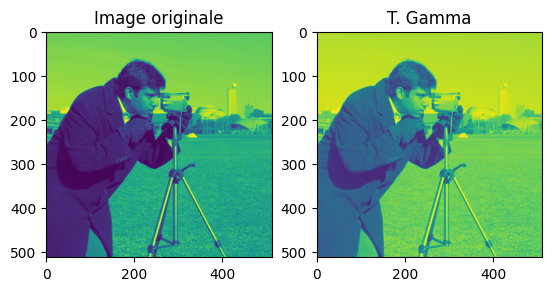

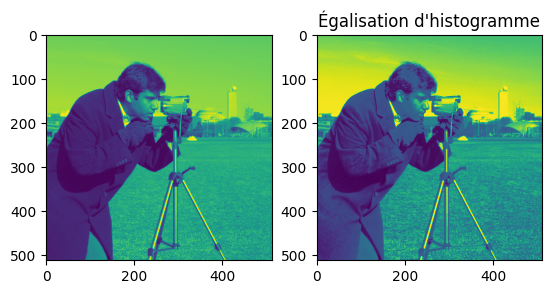

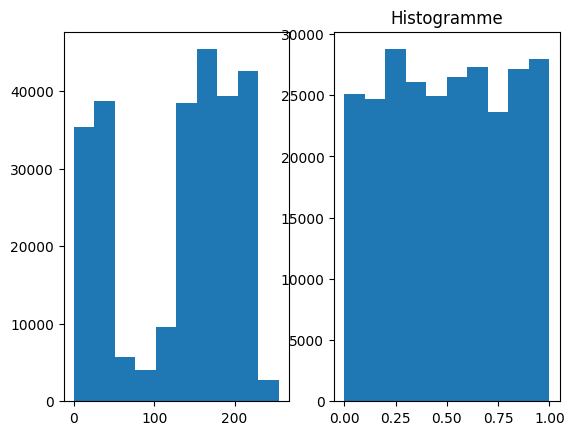

In [2]:
import skimage
import matplotlib.pyplot as plt
img = skimage.data.camera()

# Transformation Gamma
img_t = skimage.exposure.adjust_gamma(img, 0.5)
plt.subplot(121); plt.imshow(img); plt.title('Image originale')
plt.subplot(122); plt.imshow(img_t); plt.title('T. Gamma')
plt.show()

# Égalisation d'histogramme
img_t = skimage.exposure.equalize_hist(img)
plt.subplot(121); plt.imshow(img)
plt.subplot(122); plt.imshow(img_t); plt.title('Égalisation d\'histogramme')
plt.show()

# Afficher l'histogramme
plt.subplot(121); plt.hist(img.ravel())
plt.subplot(122); plt.hist(img_t.ravel()); plt.title('Histogramme')
plt.show()

# Module `skimage.transform`

- `skimage.transform.rescale(image, scale[, …])` : Mise à l'échelle d'une image par un facteur
- `skimage.transform.resize(image, output_shape)` : Modifie la taille de l'image
- `skimage.transform.rotate(image, angle[, …])` : Rotation d'une image d'une certain angle autour de son centre
- `skimage.transform.swirl(image[, center, …])` : Transformation en tourbillon
- `skimage.transform.AffineTransform([matrix, …])` : Transformation affine 2D

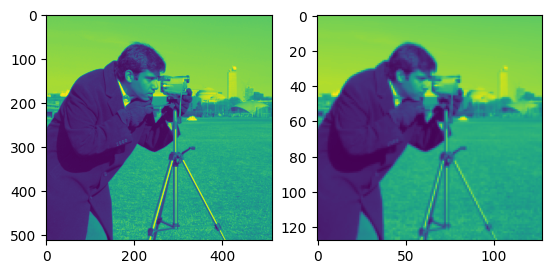

In [3]:
# Mettre à l'échelle d'une facteur 1/4
from skimage import transform
img_small = transform.rescale(img, 0.25)
plt.subplot(121); plt.imshow(img);
plt.subplot(122); plt.imshow(img_small)
plt.show()

In [4]:
help(transform.rescale)

Help on function rescale in module skimage.transform._warps:

rescale(image, scale, order=None, mode='reflect', cval=0, clip=True, preserve_range=False, anti_aliasing=None, anti_aliasing_sigma=None, *, channel_axis=None)
    Scale image by a certain factor.
    
    Performs interpolation to up-scale or down-scale N-dimensional images.
    Note that anti-aliasing should be enabled when down-sizing images to avoid
    aliasing artifacts. For down-sampling with an integer factor also see
    `skimage.transform.downscale_local_mean`.
    
    Parameters
    ----------
    image : (M, N[, ...][, C]) ndarray
        Input image.
    scale : {float, tuple of floats}
        Scale factors for spatial dimensions. Separate scale factors can be defined as
        (m, n[, ...]).
    
    Returns
    -------
    scaled : ndarray
        Scaled version of the input.
    
    Other parameters
    ----------------
    order : int, optional
        The order of the spline interpolation, default is 0 i

In [5]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image, set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
  

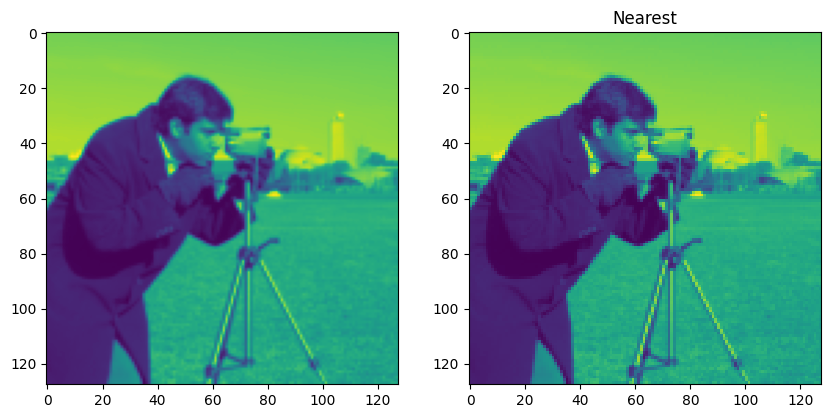

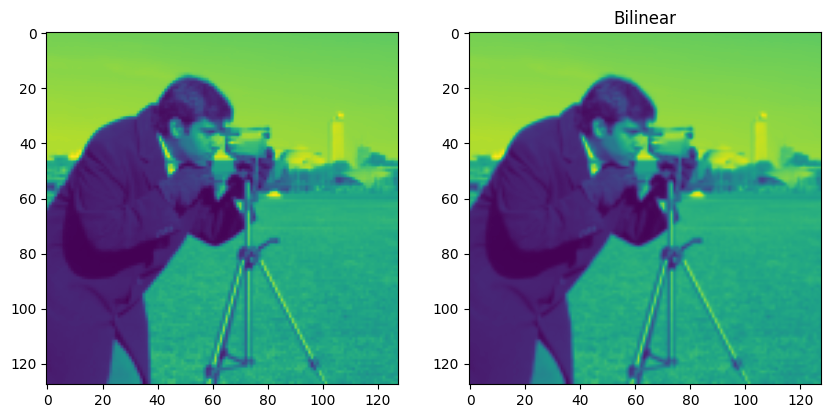

In [7]:
# Exemple interpolation pour l'affichage
plt.figure(figsize=(10,5))
plt.subplot(121); plt.imshow(img_small)
plt.subplot(122); plt.imshow(img_small, interpolation="nearest"); plt.title('Nearest')
plt.show()


plt.figure(figsize=(10,5))
plt.subplot(121); plt.imshow(img_small)
plt.subplot(122); plt.imshow(img_small, interpolation="bilinear"); plt.title('Bilinear')
plt.show()

# Module `skimage.filters`
https://scikit-image.org/docs/stable/api/skimage.filters.html

Quelques filtres disponibles (nous en verrons d'autres plus tard durant la session)
- `skimage.filters.correlate_sparse(image, kernel)` : Corrélation entre une image et un noyau
- `skimage.filters.gaussian(image[, sigma, …])` : Filtre Gaussien multi-dimensionnel
- `skimage.filters.median(image[, selem, out, …])` : Filtre médian local
- `skimage.filters.sobel(image[, mask, axis, …])` : Trouve les contours avec un filtre de Sobel.
- `skimage.filters.unsharp_mask(image[, …])` : Filtre rehausseur (Unsharp).
- `skimage.filters.rank`

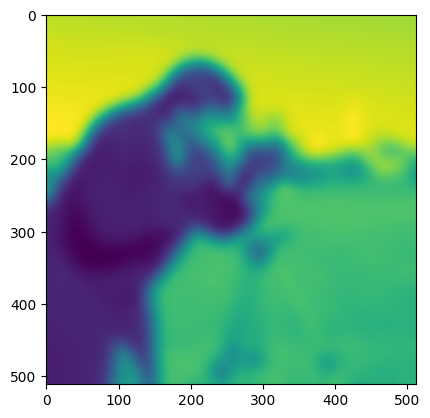

In [8]:
from skimage import filters
plt.imshow(skimage.filters.gaussian(img, 11)); plt.show()

# Module `scipy.ndimage.filters`
https://docs.scipy.org/doc/scipy/reference/ndimage.html

- `convolve(input, weights[, output, mode, …])` : Convolution multidimensionnelle
- `correlate(input, weights[, output, mode, …])` : Corrélation multidimensionnelle
- `gaussian_filter(input, sigma[, order, …])` : Filtre Gaussien multidimensionnelle
- `generic_filter(input, function[, size, …])` : Filtre générique multidimensionnel
- `maximum_filter(input[, size, footprint, …])` : Filtre maximum multidimensionnel
- `median_filter(input[, size, footprint, …])` : Filtre médiane multidimensionnel
- `minimum_filter(input[, size, footprint, …])` : Filtre minimum multidimensionnel
- `percentile_filter(input, percentile[, size, …])` : Filtre percentile multidimensionnel
- `rank_filter(input, rank[, size, footprint, …])` : Filtre rank multidimensionnel
- `uniform_filter(input[, size, output, mode, …])` : Filtre uniforme multidimensionnel

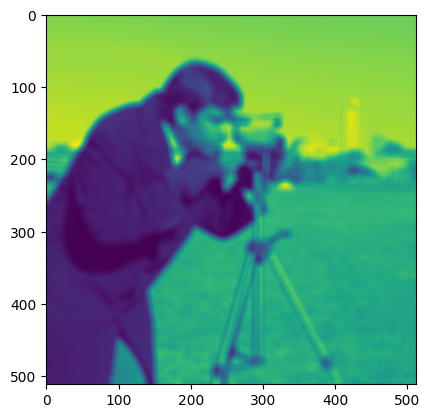

In [9]:
# Différence entre corrélation et convolution
from scipy.ndimage import uniform_filter
plt.imshow(uniform_filter(img, 11)); plt.show()

# Histogrammes avec numpy et matplotlib

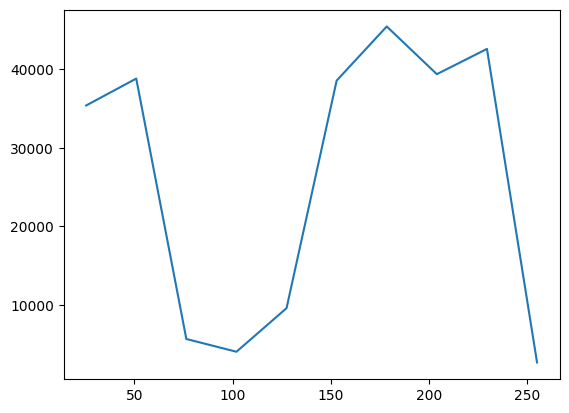

In [10]:
import numpy as np

nVals, bins = np.histogram(img) # À ne pas utiliser pour le TP1
plt.plot(bins[1::], nVals)
